In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import functions as fu
import rhos as rh
import test as test

## Separable State

In [2]:
# parameters

N = 3
D = 2  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "separable"

In [3]:
# Initialization of the coefficients c_j for each subsystem

init_coeff = [
    np.array([1, 0]),  # Subsystem 1 (|0⟩)
    np.array([1/np.sqrt(2), 1/np.sqrt(2)]),  # Subsystem 2 (|0⟩ + |1⟩) / √2
    np.array([0, 1])   # Subsystem 3 (|1⟩)
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
# coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization

In [4]:
# Calculate the separable state
separable_state = fu.create_state(N, D, coefficients, type)

print(f"Length of the separable pure state (N={N}, D={D}): \n \n {len(separable_state)}\n")
print(f"General state: \n \n {separable_state}\n")

Length of the separable pure state (N=3, D=2): 
 
 8

General state: 
 
 [-0.21261639+0.44249785j -0.3207483 +0.43348788j -0.09240641+0.37655275j
 -0.17744337+0.38716396j -0.14357266+0.13221409j -0.182193  +0.11299431j
 -0.08947495+0.12552013j -0.1224475 +0.11694263j]



In [5]:
print("Separable state:", separable_state)

Separable state: [-0.21261639+0.44249785j -0.3207483 +0.43348788j -0.09240641+0.37655275j
 -0.17744337+0.38716396j -0.14357266+0.13221409j -0.182193  +0.11299431j
 -0.08947495+0.12552013j -0.1224475 +0.11694263j]


## General State

In [6]:
# parameters

N = 3
D = 2  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "general"

In [7]:
# Initialization of the coefficients

init_coeff = [
    1/np.sqrt(2), 0, 0, 1/2, 1/2, 0, 0, 0  
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization



In [8]:
# Calculate the separable state
general_state = fu.create_state(N, D, coefficients, type)

print(f"Length of the general pure state (N={N}, D={D}): \n \n {len(general_state)}\n")
print(f"Separable state: \n \n {general_state}\n")

Length of the general pure state (N=3, D=2): 
 
 8

Separable state: 
 
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.5       +0.j
 0.5       +0.j 0.        +0.j 0.        +0.j 0.        +0.j]



In [9]:
print("General state:", general_state)

General state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.5       +0.j
 0.5       +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


## Efficiency

#### Separable State

In [10]:
# parameters

N_max = 6
D_max = 30  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "separable"

In [11]:
N_sizes, D_sizes, cpu_times_matrix_separable, bytes_matrix_separable = fu.comput_time(N_max, D_max, seed, type)

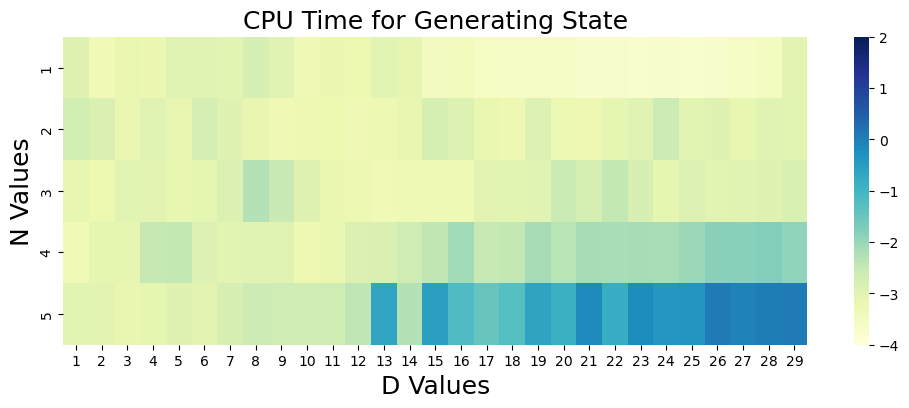

In [12]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("CPU Time for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("log(CPU Time) for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_separable), annot=False, vmin=2, vmax=8.5,  cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("log(Bytes) for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

<Figure size 1200x900 with 0 Axes>

#### General

In [20]:
# parameters

N_max = 5
D_max = 20  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "general"

N_sizes, D_sizes, cpu_times_matrix_general, bytes_matrix_general = fu.comput_time(N_max, D_max, seed, type)

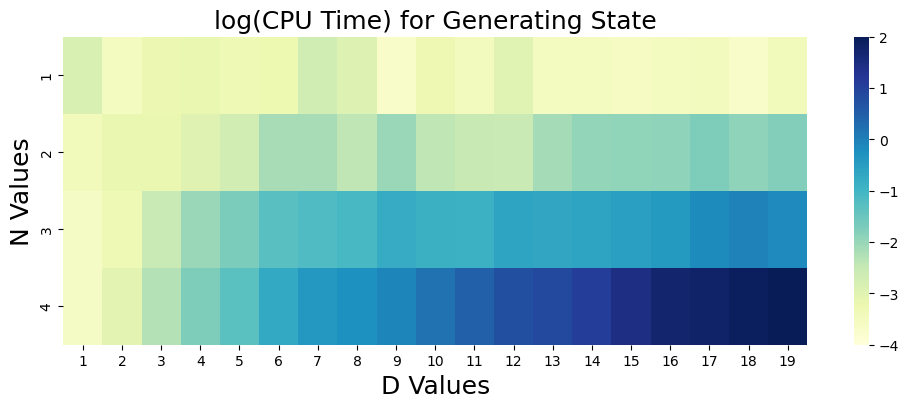

In [21]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("log(CPU Time) for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

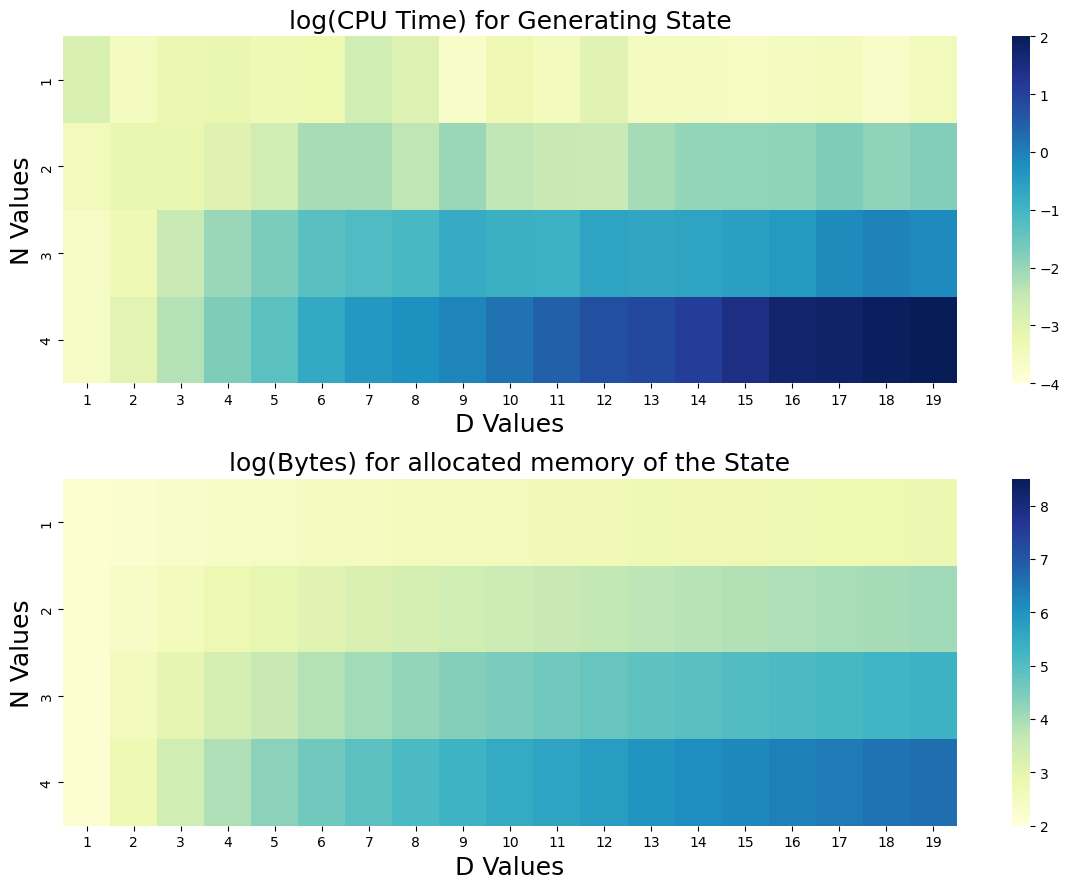

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("log(CPU Time) for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_general), annot=False, vmin=2, vmax=8.5, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("log(Bytes) for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

### Density Matrices

In [29]:
# parameters

N = 4   # 2 subsystems
D = 3   # QUTRITS
        # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

In [30]:
type = "general"

coefficients_general = fu.initialize_coefficients(N, D, seed, type, random_init=True)  # Use random initialization

psi_general = fu.create_state(N, D, coefficients_general, type)

In [25]:
rho_general = rh.rho(psi_general)

In [17]:
print(f"Density matrix for a general state with N={N} and D={D}: \n\n {rho_general}\n")

Density matrix for a general state with N=4 and D=3: 

 [[0.01957717+0.j         0.00730818-0.00112534j 0.00946641-0.00975095j
  ... 0.01311334-0.00468146j 0.01886772+0.00070365j
  0.01517748+0.0082487j ]
 [0.00730818+0.00112534j 0.00279284+0.j         0.00409433-0.00309589j
  ... 0.00516433-0.00099381j 0.0070029 +0.00134723j
  0.00519162+0.00395168j]
 [0.00946641+0.00975095j 0.00409433+0.00309589j 0.00943415+0.j
  ... 0.0086726 +0.00426778j 0.00877289+0.00973783j
  0.00323048+0.01154817j]
 ...
 [0.01311334+0.00468146j 0.00516433+0.00099381j 0.0086726 -0.00426778j
  ... 0.00990316+0.j         0.01246987+0.00498313j
  0.00819381+0.00915458j]
 [0.01886772-0.00070365j 0.0070029 -0.00134723j 0.00877289-0.00973783j
  ... 0.01246987-0.00498313j 0.01820927+0.j
  0.01492395+0.00740427j]
 [0.01517748-0.0082487j  0.00519162-0.00395168j 0.00323048-0.01154817j
  ... 0.00819381-0.00915458j 0.01492395-0.00740427j
  0.01524209+0.j        ]]



In [32]:
print("General state case", '\n')

# keep_indices = [0]  # Keep the first site

keep_indices = list(range(N // 2))  # Keep left block sites
rdm_left = rh.get_reduced_density_matrix(psi_general, D, N, keep_indices, print_rho=True)

# print('\n', '\n')

# # Compute the reduced density matrix for the second site (trace out the first site)
# keep_indices = [1]  # Keep the second site
# rdm_right = rh.get_reduced_density_matrix(psi_general, D, N, keep_indices, print_rho=True)


General state case 

Reordered psi_tensor shape: (3, 3, 3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([2, 3])
----------------------------------------------------
[[0.09518216+0.00000000e+00j 0.09962457-1.81821721e-02j
  0.08496281+1.13309572e-02j 0.08745225-1.85242349e-02j
  0.08460735-1.32946527e-02j 0.07007072-1.10073739e-02j
  0.07897299+1.02536009e-03j 0.08318556-4.13639573e-03j
  0.08810161+4.28272720e-03j]
 [0.09962457+1.81821721e-02j 0.15567396+0.00000000e+00j
  0.10863129+4.03669182e-02j 0.10415162-4.26870931e-04j
  0.10608125-8.00480054e-04j 0.0906031 +2.31942753e-02j
  0.08785933+1.83572639e-02j 0.10167827+2.25830646e-02j
  0.10185813+3.39801284e-02j]
 [0.08496281-1.13309572e-02j 0.10863129-4.03669182e-02j
  0.10982764+0.00000000e+00j 0.08175851-4.01293144e-02j
  0.09134082-3.91638469e-02j 0.08745756-1.01969229e-02j
  0.0763921 -1.51312756e-02j 0.08850069-1.08008220e-02j
  0.08743996-3.96528078e-03j]
 [0.08745225+1.85242349e-02j 0.1

In [19]:
type = "separable"

coefficients_separable = fu.initialize_coefficients(N, D, seed, type, random_init=True)  # Use random initialization

psi_separable = fu.create_state(N, D, coefficients_separable, type)

rho_separable = rh.rho(psi_separable)

In [20]:
print(f"Density matrix for a general state with N={N} and D={D}: \n\n {rho_separable}\n")

Density matrix for a general state with N=4 and D=3: 

 [[0.0221063 +0.j         0.01580911+0.00104227j 0.01305245+0.00224647j
  ... 0.01056299-0.01845312j 0.00842405-0.01269855j
  0.00811204-0.00982204j]
 [0.01580911-0.00104227j 0.01135488+0.j         0.00944025+0.00099115j
  ... 0.00668399-0.0136946j  0.00542567-0.00947843j
  0.00533816-0.00740661j]
 [0.01305245-0.00224647j 0.00944025-0.00099115j 0.00793498+0.j
  ... 0.00436158-0.01196889j 0.00368345-0.0083538j
  0.00379155-0.00662368j]
 ...
 [0.01056299+0.01845312j 0.00668399+0.0136946j  0.00436158+0.01196889j
  ... 0.02045093+0.j         0.01462529+0.00096422j
  0.01207505+0.00207825j]
 [0.00842405+0.01269855j 0.00542567+0.00947843j 0.00368345+0.0083538j
  ... 0.01462529-0.00096422j 0.0105046 +0.j
  0.00873335+0.00091693j]
 [0.00811204+0.00982204j 0.00533816+0.00740661j 0.00379155+0.00662368j
  ... 0.01207505-0.00207825j 0.00873335-0.00091693j
  0.00734079+0.j        ]]



In [21]:
print("Separable state case", '\n')

keep_indices = [0]  # Keep the first site
rdm_left = rh.get_reduced_density_matrix(psi_separable, D, N, keep_indices, print_rho=True)

print('\n', '\n')

# Compute the reduced density matrix for the second site (trace out the first site)
keep_indices = [1]  # Keep the second site
rdm_right = rh.get_reduced_density_matrix(psi_separable, D, N, keep_indices, print_rho=True)


Separable state case 

Reordered psi_tensor shape: (3, 3, 3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1, 2, 3])
----------------------------------------------------
[[0.52770231+8.91987390e-19j 0.23893834-2.69694679e-01j
  0.1705356 -3.00538584e-01j]
 [0.23893834+2.69694679e-01j 0.24602271-2.28340643e-18j
  0.23081413-4.89246438e-02j]
 [0.1705356 +3.00538584e-01j 0.23081413+4.89246438e-02j
  0.22627498+7.95516423e-19j]]

 

Reordered psi_tensor shape: (3, 3, 3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0, 2, 3])
----------------------------------------------------
[[0.35459646+6.25452780e-19j 0.29222682-7.68742997e-02j
  0.35281246-1.14345995e-01j]
 [0.29222682+7.68742997e-02j 0.25749319+4.93611933e-20j
  0.3155461 -1.77462455e-02j]
 [0.35281246+1.14345995e-01j 0.3155461 +1.77462455e-02j
  0.38791035-9.39207053e-19j]]


## Test

In [22]:
test.test_separable_state_simple()
test.test_separable_state_combination()
test.test_general_state_bell()
test.test_general_state_single_nonzero()
test.test_separable_state_equal_superposition()

### TEST: Separable State Simple ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 

### TEST: Separable State Combination ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

 

### TEST: General State Bell ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]

 

### TEST: General State Single Non-Zero Component ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0